# **Step 1: Importing the required libraries**

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.metrics import silhouette_score 
import scipy.cluster.hierarchy as shc 

# **Step 2: Loading and Cleaning the data**

In [9]:
X = pd.read_csv('CC GENERAL.csv') 
  
# Dropping the CUST_ID column from the data 
X = X.drop('CUST_ID', axis = 1) 
  
# Handling the missing values 
X.fillna(method ='ffill', inplace = True)

X.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# **Step 3: Preprocessing the data**

In [6]:
# Scaling the data so that all the features become comparable 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 
  
# Normalizing the data so that the data approximately  
# follows a Gaussian distribution 
X_normalized = normalize(X_scaled) 
  
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 

# **Step 4: Reducing the dimensionality of the Data**

In [8]:
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
X_principal.head()

,P1,P2
0,-0.489949,-0.679976
1,-0.519100,0.544827
2,0.330634,0.268879
3,-0.481657,-0.097610
4,-0.563512,-0.482506


# **Step 5: Visualizing the working of the Dendograms**

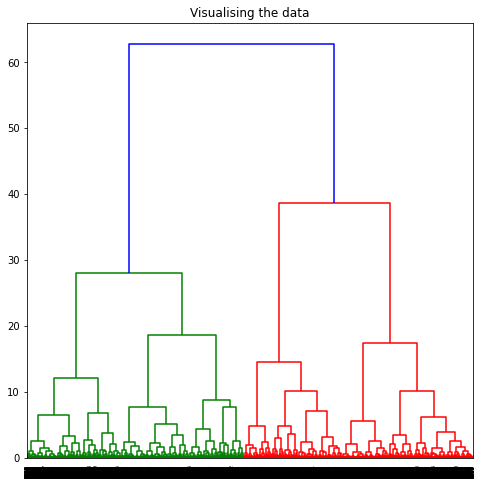

In [10]:
# Dendograms are used to divide a given cluster into many different clusters.

plt.figure(figsize =(8, 8)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward'))) 


# To determine the optimal number of clusters by visualizing the data, 
# imagine all the horizontal lines as being completely horizontal and 
# then after calculating the maximum distance between any two horizontal lines, draw a horizontal line in the maximum distance calculated.



# The above image shows that the optimal number of clusters should be 2 for the given data.


# **Step 6: Building and Visualizing the different clustering models for different values of k**




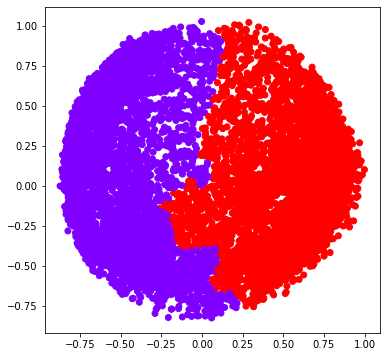

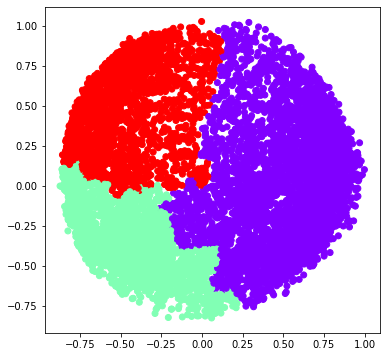

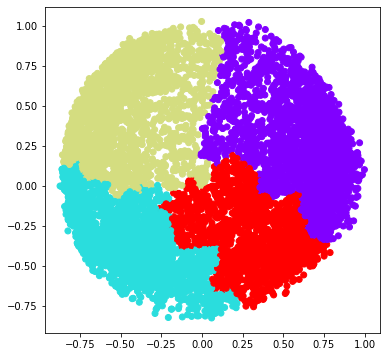

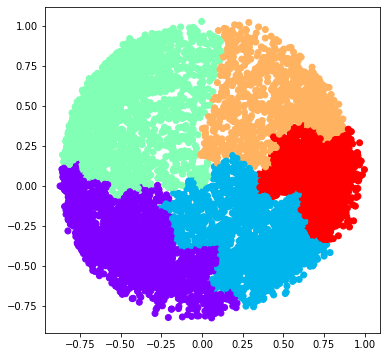

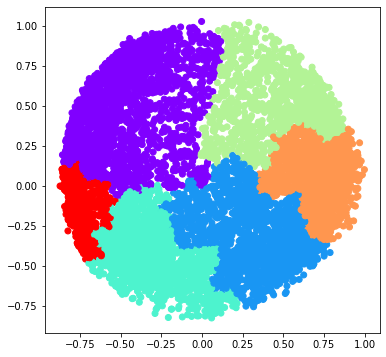

In [13]:

# a) k = 2


ac2 = AgglomerativeClustering(n_clusters = 2) 
  
# Visualizing the clustering 
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = ac2.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 


# b) k = 3


ac3 = AgglomerativeClustering(n_clusters = 3) 
  
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
           c = ac3.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 


# c) k = 4


ac4 = AgglomerativeClustering(n_clusters = 4) 
  
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
            c = ac4.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 


# d) k = 5


ac5 = AgglomerativeClustering(n_clusters = 5) 
  
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
            c = ac5.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 


# e) k = 6


ac6 = AgglomerativeClustering(n_clusters = 6) 
  
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
            c = ac6.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 




# **Step 7: Evaluating the different models and Visualizing the results.**

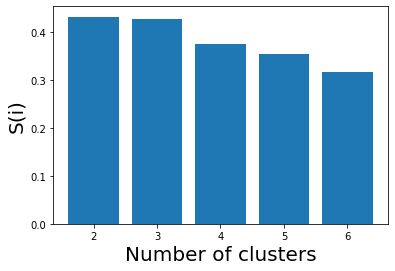

In [14]:
# We now determine the optimal number of clusters using a mathematical technique. Here, We will use the Silhouette Scores for the purpose.


k = [2, 3, 4, 5, 6] 
  
# Appending the silhouette scores of the different models to the list 
silhouette_scores = [] 
silhouette_scores.append( 
        silhouette_score(X_principal, ac2.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, ac3.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, ac4.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, ac5.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, ac6.fit_predict(X_principal))) 
  
# Plotting a bar graph to compare the results 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show() 


# Thus, with the help of the silhouette scores, it is concluded that the optimal number of clusters for the given data and clustering technique is 2.

